# covid-19 cases nationwise analysis

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

About the Project: 
        
        From Wikipedia,

Coronavirus disease 2019 (COVID-19) is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The disease was first identified in 2019 in Wuhan, China, and has since spread globally, resulting in the 2019–20 coronavirus pandemic. Common symptoms include fever, cough and shortness of breath. Muscle pain, sputum production and sore throat are less common. The rate of deaths per number of diagnosed cases is on average 3.4%, ranging from 0.2% in those less than 20 to approximately 15% in those over 80 years old.

Data Source (Date wise) : 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE

Data Source: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

File naming convention

MM-DD-YYYY.csv in UTC.

Field description

Province/State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.
Country/Region: country/region name conforming to WHO (will be updated).
Last Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).
Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)
Deaths: the number of deaths.
Recovered: the number of recovered cases.
Update frequency
Files after Feb 1 (UTC): once a day around 23:59 (UTC).
Files on and before Feb 1 (UTC): the last updated files before 23:59 (UTC).
Using above dataset I have don analysis on COVID-19 (Spread of the novel coronavirus, Analysis, Visualization, Prediction & Comparisons

In [3]:
covidb = pd.read_csv('Covid19_cases_on_01-01-2021.csv')

In [4]:
covidb

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-02 05:22:33,33.939110,67.709953,52513,2201,41727,8585,Afghanistan,134.896578,4.191343
1,NaN,NaN,NaN,Albania,2021-01-02 05:22:33,41.153300,20.168300,58316,1181,33634,23501,Albania,2026.409062,2.025173
2,NaN,NaN,NaN,Algeria,2021-01-02 05:22:33,28.033900,1.659600,99897,2762,67395,29740,Algeria,227.809861,2.764848
3,NaN,NaN,NaN,Andorra,2021-01-02 05:22:33,42.506300,1.521800,8117,84,7463,570,Andorra,10505.403482,1.034865
4,NaN,NaN,NaN,Angola,2021-01-02 05:22:33,-11.202700,17.873900,17568,405,11146,6017,Angola,53.452981,2.305328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4002,NaN,NaN,NaN,Antarctica,2021-01-02 05:22:33,-71.949900,23.347000,0,0,0,0,Antarctica,0.000000,0.000000
4003,NaN,NaN,Jersey,United Kingdom,2021-01-02 05:22:33,49.213800,-2.135800,2739,42,0,0,"Jersey, United Kingdom",0.000000,0.000000
4004,NaN,NaN,Guernsey,United Kingdom,2021-01-02 05:22:33,49.448196,-2.589490,298,16,0,0,"Guernsey, United Kingdom",0.000000,0.000000
4005,NaN,NaN,NaN,"Korea, North",2021-01-02 05:22:33,40.339900,127.510100,0,0,0,0,"Korea, North",0.000000,0.000000


In [5]:
covidb.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

1. Write a Python program to display first 5 rows from COVID-19 dataset. Also print the dataset information and check the missing values. 

In [6]:
## Showing top give head rows of the covid dataset.
covidb.head(5)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-02 05:22:33,33.93911,67.709953,52513,2201,41727,8585,Afghanistan,134.896578,4.191343
1,NaN,NaN,NaN,Albania,2021-01-02 05:22:33,41.15330,20.168300,58316,1181,33634,23501,Albania,2026.409062,2.025173
2,NaN,NaN,NaN,Algeria,2021-01-02 05:22:33,28.03390,1.659600,99897,2762,67395,29740,Algeria,227.809861,2.764848
3,NaN,NaN,NaN,Andorra,2021-01-02 05:22:33,42.50630,1.521800,8117,84,7463,570,Andorra,10505.403482,1.034865
4,NaN,NaN,NaN,Angola,2021-01-02 05:22:33,-11.20270,17.873900,17568,405,11146,6017,Angola,53.452981,2.305328


In [7]:
### Checking out the missing values in dataset. 
covidb.isnull().sum()

FIPS                   742
Admin2                 737
Province_State         176
Country_Region           0
Last_Update              0
Lat                     89
Long_                   89
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
Combined_Key             0
Incident_Rate           89
Case_Fatality_Ratio     48
dtype: int64

2. Write a Python program to get the latest number of confirmed, deaths, recovered and active cases of Novel Coronavirus (COVID-19) Country wise. 

In [8]:
data = covidb.groupby('Country_Region')['Confirmed','Deaths','Recovered','Active'].sum().reset_index()
data = data[['Country_Region','Confirmed','Deaths','Recovered','Active']]
data = data.reset_index(drop = True)
print(data)

           Country_Region  Confirmed  Deaths  Recovered  Active
0             Afghanistan      52513    2201      41727    8585
1                 Albania      58316    1181      33634   23501
2                 Algeria      99897    2762      67395   29740
3                 Andorra       8117      84       7463     570
4                  Angola      17568     405      11146    6017
..                    ...        ...     ...        ...     ...
193    West Bank and Gaza     139223    1418     118926   18879
194  Winter Olympics 2022          0       0          0       0
195                 Yemen       2101     610       1396      95
196                Zambia      20997     390      18773    1834
197              Zimbabwe      14084     369      11347    2368

[198 rows x 5 columns]


C:\Users\sudes\AppData\Local\Temp/ipykernel_68116/2838351353.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = covidb.groupby('Country_Region')['Confirmed','Deaths','Recovered','Active'].sum().reset_index()


In [9]:
data

,Country_Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,52513,2201,41727,8585
1,Albania,58316,1181,33634,23501
2,Algeria,99897,2762,67395,29740
3,Andorra,8117,84,7463,570
4,Angola,17568,405,11146,6017
...,...,...,...,...,...
193,West Bank and Gaza,139223,1418,118926,18879
194,Winter Olympics 2022,0,0,0,0
195,Yemen,2101,610,1396,95
196,Zambia,20997,390,18773,1834


In [10]:
data = covidb.groupby('Country_Region')['Confirmed','Deaths','Recovered','Active'].sum().reset_index()
data = data.sort_values('Confirmed', ascending = False)
data = data[['Country_Region','Confirmed','Deaths','Recovered','Active']]
data = data.reset_index(drop = True)
print(data)

           Country_Region  Confirmed  Deaths  Recovered    Active
0                      US   20370192  352185          0  19978335
1                   India   10305788  149218    9929568    273109
2                  Brazil    7703971  195541    6855372    649795
3                  Russia    3153960   56798    2553467    543695
4                  France    2697014   64891     200822   2431301
..                    ...        ...     ...        ...       ...
193            Antarctica          0       0          0         0
194                 Palau          0       0          0         0
195  Winter Olympics 2022          0       0          0         0
196              Kiribati          0       0          0         0
197          Korea, North          0       0          0         0

[198 rows x 5 columns]


C:\Users\sudes\AppData\Local\Temp/ipykernel_68116/2623238382.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = covidb.groupby('Country_Region')['Confirmed','Deaths','Recovered','Active'].sum().reset_index()


3. Write a Python program to get the latest number of confirmed deaths and recovered people of Novel Coronavirus (COVID-19) cases Country/Region - Province/State wise.

In [11]:
data = covidb.groupby(['Country_Region','Province_State'])['Confirmed','Deaths','Active','Recovered'].max()
data

C:\Users\sudes\AppData\Local\Temp/ipykernel_68116/2316729075.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = covidb.groupby(['Country_Region','Province_State'])['Confirmed','Deaths','Active','Recovered'].max()


Confirmed  \
Country_Region Province_State                                            
Australia      Australian Capital Territory                        118   
               New South Wales                                    4947   
               Northern Territory                                   75   
               Queensland                                         1255   
               South Australia                                     580   
...                                                                ...   
United Kingdom Saint Helena, Ascension and Tristan da Cunha          4   
               Scotland                                         129992   
               Turks and Caicos Islands                            893   
               Unknown                                               0   
               Wales                                            148537   

                                                             Deaths  Active  \
Country_Region Province_State                                                 
Australia      Australian Capital Territory                       3       1   
               New South Wales                                   54    4893   
               Northern Territory                                 0       4   
               Queensland                                         6      25   
               South Australia                                    4      10   
...                                                             ...     ...   
United Kingdom Saint Helena, Ascension and Tristan da Cunha       0       1   
               Scotland                                        4578  125414   
               Turks and Caicos Islands                           6     104   
               Unknown                                            0       0   
               Wales                                           3494  145043   

                                                             Recovered  
Country_Region Province_State                                           
Australia      Australian Capital Territory                        114  
               New South Wales                                       0  
               Northern Territory                                   71  
               Queensland                                         1224  
               South Australia                                     566  
...                                                                ...  
United Kingdom Saint Helena, Ascension and Tristan da Cunha          3  
               Scotland                                              0  
               Turks and Caicos Islands                            783  
               Unknown                                               0  
               Wales                                                 0  

[613 rows x 4 columns]

4. Write a Python program to get the Chinese province wise cases of confirmed, deaths and recovered cases of Novel Coronavirus (COVID-19). 

In [14]:
df = covidb.groupby(['Country_Region','Province_State'])['Confirmed','Deaths','Recovered'].sum().reset_index()
df = df[df['Country_Region'] == "China"]
df = df[['Country_Region','Province_State','Confirmed','Deaths','Recovered']]
df = df.reset_index(drop = True)
df

C:\Users\sudes\AppData\Local\Temp/ipykernel_68116/219855788.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = covidb.groupby(['Country_Region','Province_State'])['Confirmed','Deaths','Recovered'].sum().reset_index()


,Country_Region,Province_State,Confirmed,Deaths,Recovered
0,China,Anhui,993,6,986
1,China,Beijing,988,9,944
2,China,Chongqing,590,6,584
3,China,Fujian,513,1,488
4,China,Gansu,182,2,180
5,China,Guangdong,2046,8,2011
6,China,Guangxi,264,2,261
7,China,Guizhou,147,2,145
8,China,Hainan,171,6,165
9,China,Hebei,373,6,367


5. Write a Python program to get the latest country wise deaths cases of Novel Coronavirus (COVID-19).

In [15]:
df = covidb.groupby('Country_Region')['Deaths'].sum().reset_index()
df = df.sort_values('Deaths',ascending = False)
df = df[['Country_Region','Deaths']]
df = df.reset_index(drop = True)
print(df)

                       Country_Region  Deaths
0                                  US  352185
1                              Brazil  195541
2                               India  149218
3                              Mexico  126507
4                                Peru   93231
5                               Italy   74621
6                      United Kingdom   74235
7                              France   64891
8                              Russia   56798
9                                Iran   55337
10                              Spain   50837
11                           Colombia   43495
12                          Argentina   43319
13                            Germany   34150
14                             Poland   28956
15                       South Africa   28887
16                          Indonesia   22329
17                             Turkey   21093
18                            Belgium   19581
19                            Ukraine   19437
20                             Can

6. Write a Python program to list countries with no cases of Novel Coronavirus (COVID-19) recovered.

In [16]:
df = covidb.groupby('Country_Region')['Confirmed','Deaths','Recovered'].sum().reset_index()
df = df[df['Confirmed'] == df['Deaths']]
df = df.sort_values('Deaths', ascending = False)
df = df[['Country_Region','Confirmed','Deaths','Recovered']]
df = df.reset_index(drop = True)
print(df)

         Country_Region  Confirmed  Deaths  Recovered
0            Antarctica          0       0          0
1              Kiribati          0       0          0
2          Korea, North          0       0          0
3                 Palau          0       0          0
4  Summer Olympics 2020          0       0          0
5                 Tonga          0       0          0
6  Winter Olympics 2022          0       0          0


C:\Users\sudes\AppData\Local\Temp/ipykernel_68116/989095923.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = covidb.groupby('Country_Region')['Confirmed','Deaths','Recovered'].sum().reset_index()


In [17]:
df = covidb.groupby('Country_Region')['Confirmed','Deaths','Recovered'].sum().reset_index()
df = df[df.Recovered == 0]
df = df.sort_values('Deaths', ascending = False)
df = df[['Country_Region','Confirmed','Deaths','Recovered']]
df = df.reset_index(drop = True)
print(df)

          Country_Region  Confirmed  Deaths  Recovered
0                     US   20370192  352185          0
1                Belgium     648289   19581          0
2                 Sweden     437379    8727          0
3                 Serbia     339997    3250          0
4             Antarctica          0       0          0
5               Kiribati          0       0          0
6           Korea, North          0       0          0
7                  Palau          0       0          0
8   Summer Olympics 2020          0       0          0
9                  Tonga          0       0          0
10  Winter Olympics 2022          0       0          0


C:\Users\sudes\AppData\Local\Temp/ipykernel_68116/3011694050.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = covidb.groupby('Country_Region')['Confirmed','Deaths','Recovered'].sum().reset_index()


7. Write a Python program to list countries with all cases of Novel Coronavirus (COVID-19) died. 

In [24]:
df = covidb.groupby('Country_Region')['Confirmed','Active','Deaths','Recovered'].sum().reset_index()
df = df[(df['Confirmed']) ==  (df['Deaths'])]
df = df[['Country_Region','Confirmed','Deaths']]
df = df.sort_values('Confirmed', ascending = False)
df = df[df['Confirmed']>0]
df = df.reset_index(drop = True)
print(df)

Empty DataFrame
Columns: [Country_Region, Confirmed, Deaths]
Index: []


C:\Users\sudes\AppData\Local\Temp/ipykernel_68116/1298817271.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = covidb.groupby('Country_Region')['Confirmed','Active','Deaths','Recovered'].sum().reset_index()


8. Write a Python program to list countries with all cases of Novel Coronavirus (COVID-19) recovered.

In [27]:
df = covidb.groupby('Country_Region')['Confirmed','Deaths','Recovered'].sum().reset_index()
df = df[ df['Confirmed'] == df['Recovered']]
df = df[['Country_Region','Confirmed','Recovered']]
df = df.sort_values('Confirmed', ascending = False)
df = df[df['Confirmed']>0]
df = df.reset_index(drop = True)
print(df)

     Country_Region  Confirmed  Recovered
0  Marshall Islands          4          4
1             Samoa          2          2
2           Vanuatu          1          1


C:\Users\sudes\AppData\Local\Temp/ipykernel_68116/4096561472.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = covidb.groupby('Country_Region')['Confirmed','Deaths','Recovered'].sum().reset_index()


9.  Write a Python program to get the top 10 countries data (Last Update, Country/Region, Confirmed, Deaths, Recovered) of Novel Coronavirus (COVID-19). 

In [28]:
covidb.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [36]:
df = covidb.groupby('Country_Region')['Last_Update','Country_Region','Confirmed','Deaths','Recovered'].head(10)
df = df.sort_values('Confirmed', ascending = False)
df

C:\Users\sudes\AppData\Local\Temp/ipykernel_68116/395457456.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = covidb.groupby('Country_Region')['Last_Update','Country_Region','Confirmed','Deaths','Recovered'].head(10)


,Last_Update,Country_Region,Confirmed,Deaths,Recovered
647,2021-01-02 05:22:33,Turkey,2220855,21093,2114760
3956,2021-01-02 05:22:33,United Kingdom,2190702,64731,0
6,2021-01-02 05:22:33,Argentina,1629594,43319,1426676
487,2021-01-02 05:22:33,Poland,1305774,28956,1046281
285,2021-01-02 05:22:33,Iran,1231429,55337,995570
591,2021-01-02 05:22:33,South Africa,1073887,28887,887701
248,2021-01-02 05:22:33,India,882612,7108,871916
284,2021-01-02 05:22:33,Indonesia,751270,22329,617936
186,2021-01-02 05:22:33,Czechia,732022,11711,600073
490,2021-01-02 05:22:33,Romania,636201,15841,566365


10.  Write a Python program to create a plot (lines) of total deaths, confirmed, recovered and active cases Country wise where deaths greater than 150. 

In [37]:
df = covidb.groupby('Country_Region')['Deaths','Confirmed','Recovered','Active'].sum().reset_index()
df = df[df['Deaths'] > 150]
df = df[['Country_Region','Deaths','Confirmed','Recovered','Active']]
df = df.reset_index(drop= True)
print(df)

             Country_Region  Deaths  Confirmed  Recovered    Active
0               Afghanistan    2201      52513      41727      8585
1                   Albania    1181      58316      33634     23501
2                   Algeria    2762      99897      67395     29740
3                    Angola     405      17568      11146      6017
4                 Argentina   43319    1629594    1426676    159599
5                   Armenia    2828     159738     143355     13555
6                 Australia     909      28460      22573      4978
7                   Austria    7564     358774     334901     21749
8                Azerbaijan    2670     219041     188280     28091
9                   Bahamas     171       7887       6239      1477
10                  Bahrain     352      92913      90369      2192
11               Bangladesh    7576     514500     458656     48268
12                  Belarus    1433     196223     178102     16688
13                  Belgium   19581     648289  

C:\Users\sudes\AppData\Local\Temp/ipykernel_68116/1691456023.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = covidb.groupby('Country_Region')['Deaths','Confirmed','Recovered','Active'].sum().reset_index()


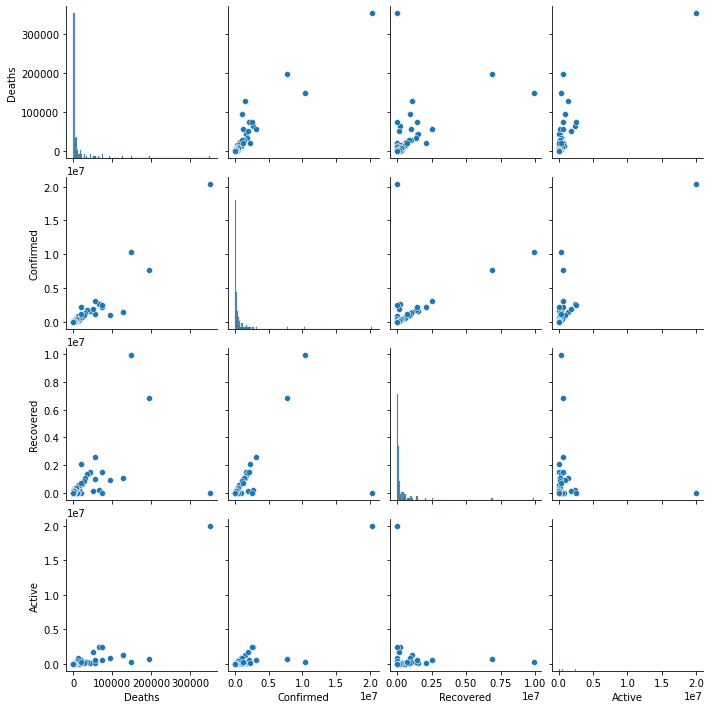

In [38]:
sns.pairplot(df)

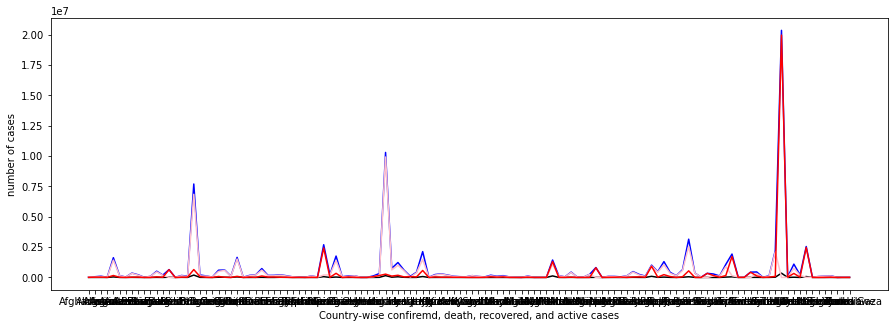

In [40]:
plt.figure(figsize = (15,5))
plt.plot(df['Country_Region'], df['Confirmed'], color = 'blue')
plt.plot(df['Country_Region'], df['Deaths'], color = 'black')
plt.plot(df['Country_Region'], df['Recovered'], color = 'pink')
plt.plot(df['Country_Region'], df['Active'], color = 'red')
plt.xlabel('Country-wise confiremd, death, recovered, and active cases')
plt.ylabel('number of cases')
plt.plot
plt.show()

11. Write a Python program to visualize the state/province wise death cases of Novel Coronavirus (COVID-19) in USA. 

In [41]:
df = covidb.groupby(['Country_Region','Province_State'])['Deaths'].sum().reset_index()
df = df[df['Country_Region'] == "US"]
df = df[['Province_State', 'Deaths']]
df = df.sort_values('Deaths', ascending = False)
df = df.reset_index(drop = True)
print(df)

              Province_State  Deaths
0                   New York   37973
1                      Texas   28359
2                 California   26258
3                    Florida   21673
4                 New Jersey   19160
5                   Illinois   17978
6               Pennsylvania   16245
7                       Ohio   13766
8                   Michigan   13018
9                    Georgia   10958
10             Massachusetts   10522
11                   Indiana    9468
12                   Arizona    9015
13                 Louisiana    7488
14                 Tennessee    6955
15            North Carolina    6748
16               Connecticut    5995
17                  Maryland    5942
18                  Missouri    5747
19                 Minnesota    5382
20            South Carolina    5296
21                 Wisconsin    5254
22                  Virginia    5081
23                  Colorado    4873
24                   Alabama    4872
25               Mississippi    4816
2

C:\Users\sudes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Province_State', ylabel='Deaths'>

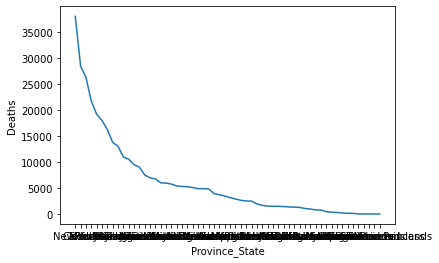

In [42]:
sns.lineplot(df['Province_State'], df['Deaths'], data = df)

The end. 